<a href="https://colab.research.google.com/github/Zarate73/Simulaci-n-/blob/main/Leapfrog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

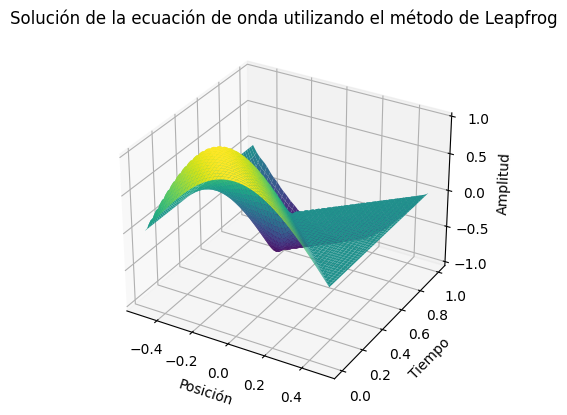

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Parámetros
L = 1             # Longitud del dominio
T = 1             # Tiempo total
Nx = 100          # Número de puntos en el espacio
Nt = 1000         # Número de pasos de tiempo
dx = L / (Nx-1)   # Incremento espacial
dt = T / Nt       # Incremento temporal
x = np.linspace(-L/2, L/2, Nx)  # Vector de coordenadas en x

# Condiciones iniciales
u0 = np.cos(np.pi * x)  # Condición inicial u(x,0) = cos(pi*x)

# Inicialización de matrices
u = np.zeros((Nx, Nt))  # Matriz para almacenar la solución

# Paso Leapfrog
u[:,0] = u0  # Asignación de la condición inicial

# Calculamos u en el paso de tiempo n = 2 usando diferencias finitas hacia atrás
u[:,1] = u[:,0] - dt * np.pi * np.sin(np.pi * x)

for n in range(1, Nt-1):
    # Cálculo de la solución en el paso de tiempo n
    for i in range(1, Nx-1):
        u[i,n+1] = 2*u[i,n] - u[i,n-1] + (dt**2 / dx**2) * (u[i+1,n] - 2*u[i,n] + u[i-1,n])

    # Condiciones de contorno (u(-L/2, t) = u(L/2, t) = 0)
    u[0,n+1] = 0
    u[-1,n+1] = 0

# Visualización de la solución
X, T = np.meshgrid(x, np.linspace(0, T, Nt))
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, T, u.T, cmap='viridis')
ax.set_xlabel('Posición')
ax.set_ylabel('Tiempo')
ax.set_zlabel('Amplitud')
ax.set_title('Solución de la ecuación de onda utilizando el método de Leapfrog')
plt.show()


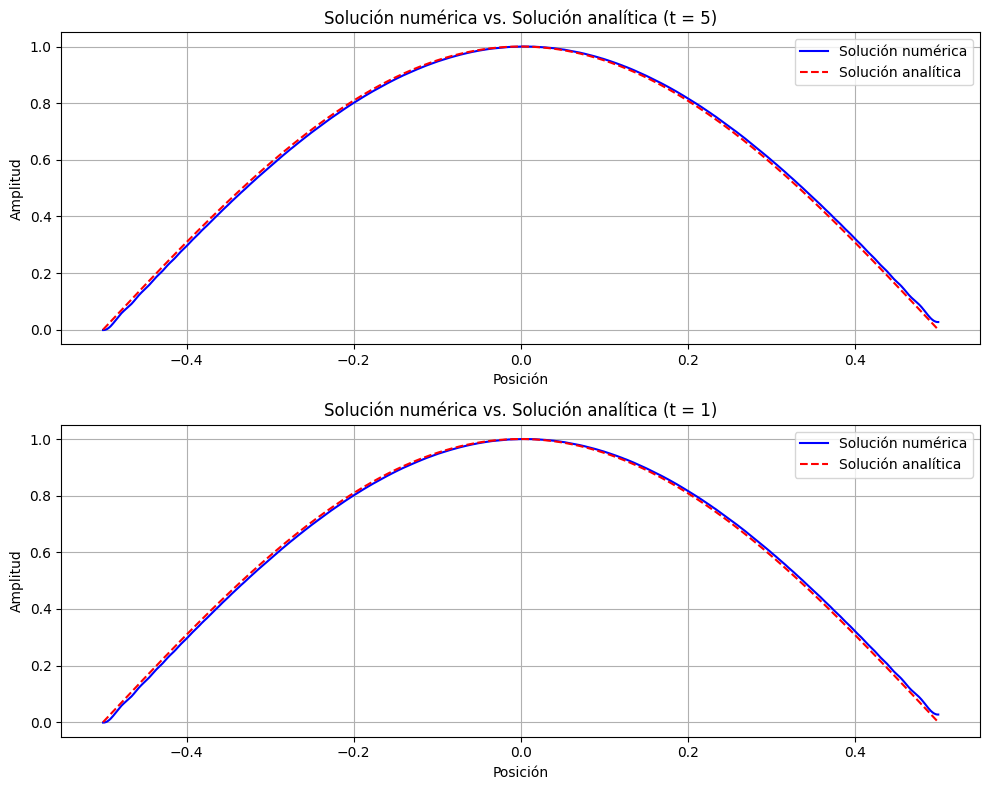

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
L = 1             # Longitud del dominio
T = 5               # Tiempo total
Nx = 1000           # Número de puntos en el espacio
Nt = 10000          # Número de pasos de tiempo
dx = L / (Nx-1)     # Incremento espacial
dt = T / Nt         # Incremento temporal
x = np.linspace(-L/2, L/2, Nx)  # Vector de coordenadas en x

# Condiciones iniciales
u0 = np.cos(np.pi * x)  # Condición inicial u(x,0) = cos(pi*x)
u0[np.abs(x) >= L/2] = 0  # Condición de frontera u(x,0) = 0 para |x| >= L/2

# Inicialización de matrices
u = np.zeros((Nx, Nt))  # Matriz para almacenar la solución

# Paso Leapfrog
u[:,0] = u0  # Asignación de la condición inicial

# Calculamos u en el paso de tiempo n = 2 usando diferencias finitas hacia atrás
u[:,1] = u[:,0] - dt * np.pi * np.sin(np.pi * x)

# Condición de frontera en la línea fantasma
u[0,1] = u[1,1]  # Línea fantasma izquierda
u[-1,1] = u[-2,1]  # Línea fantasma derecha

for n in range(1, Nt-1):
    # Cálculo de la solución en el paso de tiempo n
    for i in range(1, Nx-1):
        u[i,n+1] = 2*u[i,n] - u[i,n-1] + (dt**2 / dx**2) * (u[i+1,n] - 2*u[i,n] + u[i-1,n])

    # Condición de frontera en la línea fantasma
    u[0,n+1] = u[1,n+1]  # Línea fantasma izquierda
    u[-1,n+1] = u[-2,n+1]  # Línea fantasma derecha

# Solución analítica exacta
u_exact_t1 = np.cos(np.pi * x) * np.cos(np.pi * dt)  # Solución analítica para t = 1
u_exact_t5 = np.cos(np.pi * x) * np.cos(np.pi * 5 * dt)  # Solución analítica para t = 5

# Visualización de la solución
plt.figure(figsize=(10, 8))

plt.subplot(2, 1, 1)
plt.plot(x, u[:, -1], 'b-', label='Solución numérica')
plt.plot(x, u_exact_t5, 'r--', label='Solución analítica')
plt.xlabel('Posición')
plt.ylabel('Amplitud')
plt.title('Solución numérica vs. Solución analítica (t = 5)')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(x, u[:, -1], 'b-', label='Solución numérica')
plt.plot(x, u_exact_t1, 'r--', label='Solución analítica')
plt.xlabel('Posición')
plt.ylabel('Amplitud')
plt.title('Solución numérica vs. Solución analítica (t = 1)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


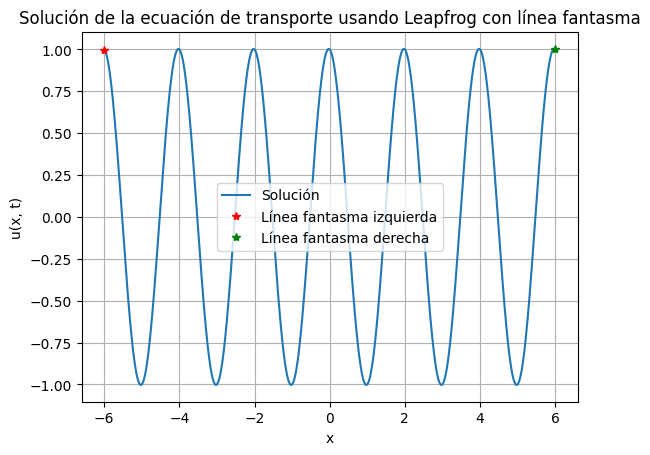

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
L = 12             # Longitud del dominio
Nx = 1000          # Número de puntos en el espacio
dx = L / (Nx - 1)  # Incremento espacial
x = np.linspace(-L/2, L/2, Nx)  # Vector de coordenadas en x

# Condiciones iniciales
u0 = np.cos(np.pi * x)  # Condición inicial u(x,0) = cos(pi*x)

# Inicialización de matrices
u = np.zeros((Nx, 3))  # Matriz para almacenar la solución (utilizamos 3 pasos de tiempo)

# Paso inicial usando Euler
u[:, 0] = u0  # Asignación de la condición inicial

# Paso Leapfrog
u[:, 1] = u[:, 0] - dx * np.pi * np.sin(np.pi * x)  # Primer paso de Leapfrog

# Implementación de Leapfrog
for n in range(2, 3):  # Avanzamos un paso de Leapfrog
    for i in range(1, Nx-1):
        u[i, n] = u[i, n-2] - 2 * dx * np.pi * np.sin(np.pi * x[i])

    # Aplicamos condiciones de frontera a la línea fantasma
    u[0, n] = u[1, n]         # Línea fantasma izquierda
    u[-1, n] = u[-2, n]       # Línea fantasma derecha

# Visualización de la solución
plt.plot(x, u[:, -1], label='Solución')
plt.plot(x[0], u[0, -1], 'r*', label='Línea fantasma izquierda')
plt.plot(x[-1], u[-1, -1], 'g*', label='Línea fantasma derecha')
plt.xlabel('x')
plt.ylabel('u(x, t)')
plt.title('Solución de la ecuación de transporte usando Leapfrog con línea fantasma')
plt.legend()
plt.grid(True)
plt.show()


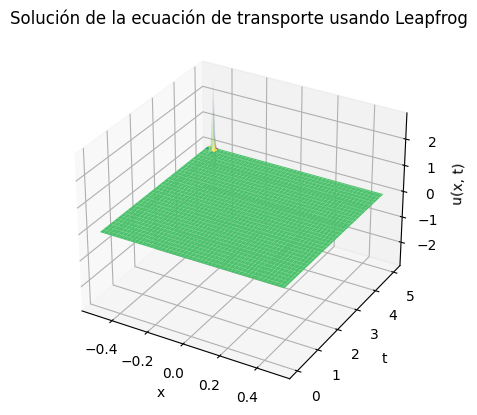

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def Leapfrog(f, G, ti, tf, xi, xf, n, m, C):
    # Tamaño de paso en x
    h = (xf - xi) / m
    X = np.linspace(xi, xf, m+1)

    # Tamaño de paso en t
    k = (tf - ti) / n

    # Inicializamos una matriz vacía para los valores de la solución
    U = np.zeros((n+1, m+1))

    # Definimos la condición inicial
    D = lambda x: np.pi * np.sin(np.pi * x)

    # Calculamos los valores iniciales en t = 0 y t = k
    for i in range(m+1):
        U[0, i] = G(X[i])
        U[1, i] = G(X[i]) + k * (f(X[i]) + D(X[i]))

    # Calculamos los valores para los pasos de tiempo subsiguientes
    for i in range(2, n):
        for j in range(1, m):
            U[i+1, j] = C * (U[i, j-1] - U[i-2, j]) + U[i-1, j]

    # Graficamos la solución
    X, T = np.meshgrid(X, np.linspace(ti, tf, n+1))
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, T, U, cmap='viridis')
    ax.set_xlabel('x')
    ax.set_ylabel('t')
    ax.set_zlabel('u(x, t)')
    ax.set_title('Solución de la ecuación de transporte usando Leapfrog')

    plt.show()

# Ejemplo de uso
def f(x):
    return x

def G(x):
    return np.cos(np.pi * x)

Leapfrog(f, G, 0, 5, -0.5, 0.5, 100, 1000, 1)